In [1]:
import scanpy 
import anndata
import numpy as np


In [ ]:
MER1_2427_anterior_path  =  r'./../../MERFISH_adata_QC/RAW_adata/MER1_CaPuNAC_2427__MERFISH_raw_adata.h5ad'
MER1_2427_anterior_adata = anndata.read_h5ad(MER1_2427_anterior_path)
print('loaded MER1...')

MER2_1311_posterior_path = r'./../../MERFISH_adata_QC/RAW_adata/MER2_Gpe_Gpi_CaPu_1311__MERFISH_raw_adata.h5ad'
MER2_1311_posterior_adata = anndata.read_h5ad(MER2_1311_posterior_path)
print('loaded MER2...')

MER4_2427_posterior_path = r'./../../MERFISH_adata_QC/RAW_adata/MER4_Gpe_Gpi_2724.h5ad'
MER4_2427_posterior_adata = anndata.read_h5ad(MER4_2427_posterior_path)
print('loaded MER4...')

MER5_3924_anterior_path = r'./../../MERFISH_adata_QC/RAW_adata/MER5_CaPuNAc_3924__MERFISH_raw_adata.h5ad'
MER5_3924_anterior_adata = anndata.read_h5ad(MER5_3924_anterior_path)
print('loaded MER5...')

loaded MER1...
loaded MER2...
loaded MER4...
loaded MER5...


- Use MER1 as a reference data and do the correlation of the others to it.

1. MER1 vs MER2

In [3]:
# ++++++++++++++++++++ MER1 mean count ++++++++++++++++++++++++++++++++++++++++
MER1_2427_anterior_adata.X = MER1_2427_anterior_adata.obsm['X_raw'].copy()
genes = MER1_2427_anterior_adata.var_names
X_mean_MER1 = MER1_2427_anterior_adata.X.mean(axis = 0)
# X_mean_MER1 = np.log(X_mean_MER1)

# ++++++++++++++++++++ MER2 mean count ++++++++++++++++++++++++++++++++++++++++
X_mean_MER2 = MER2_1311_posterior_adata[:,genes].X.mean(axis = 0) # Note X is raw, has not been preprocessed 
# X_mean_MER2 = np.log(X_mean_MER2)


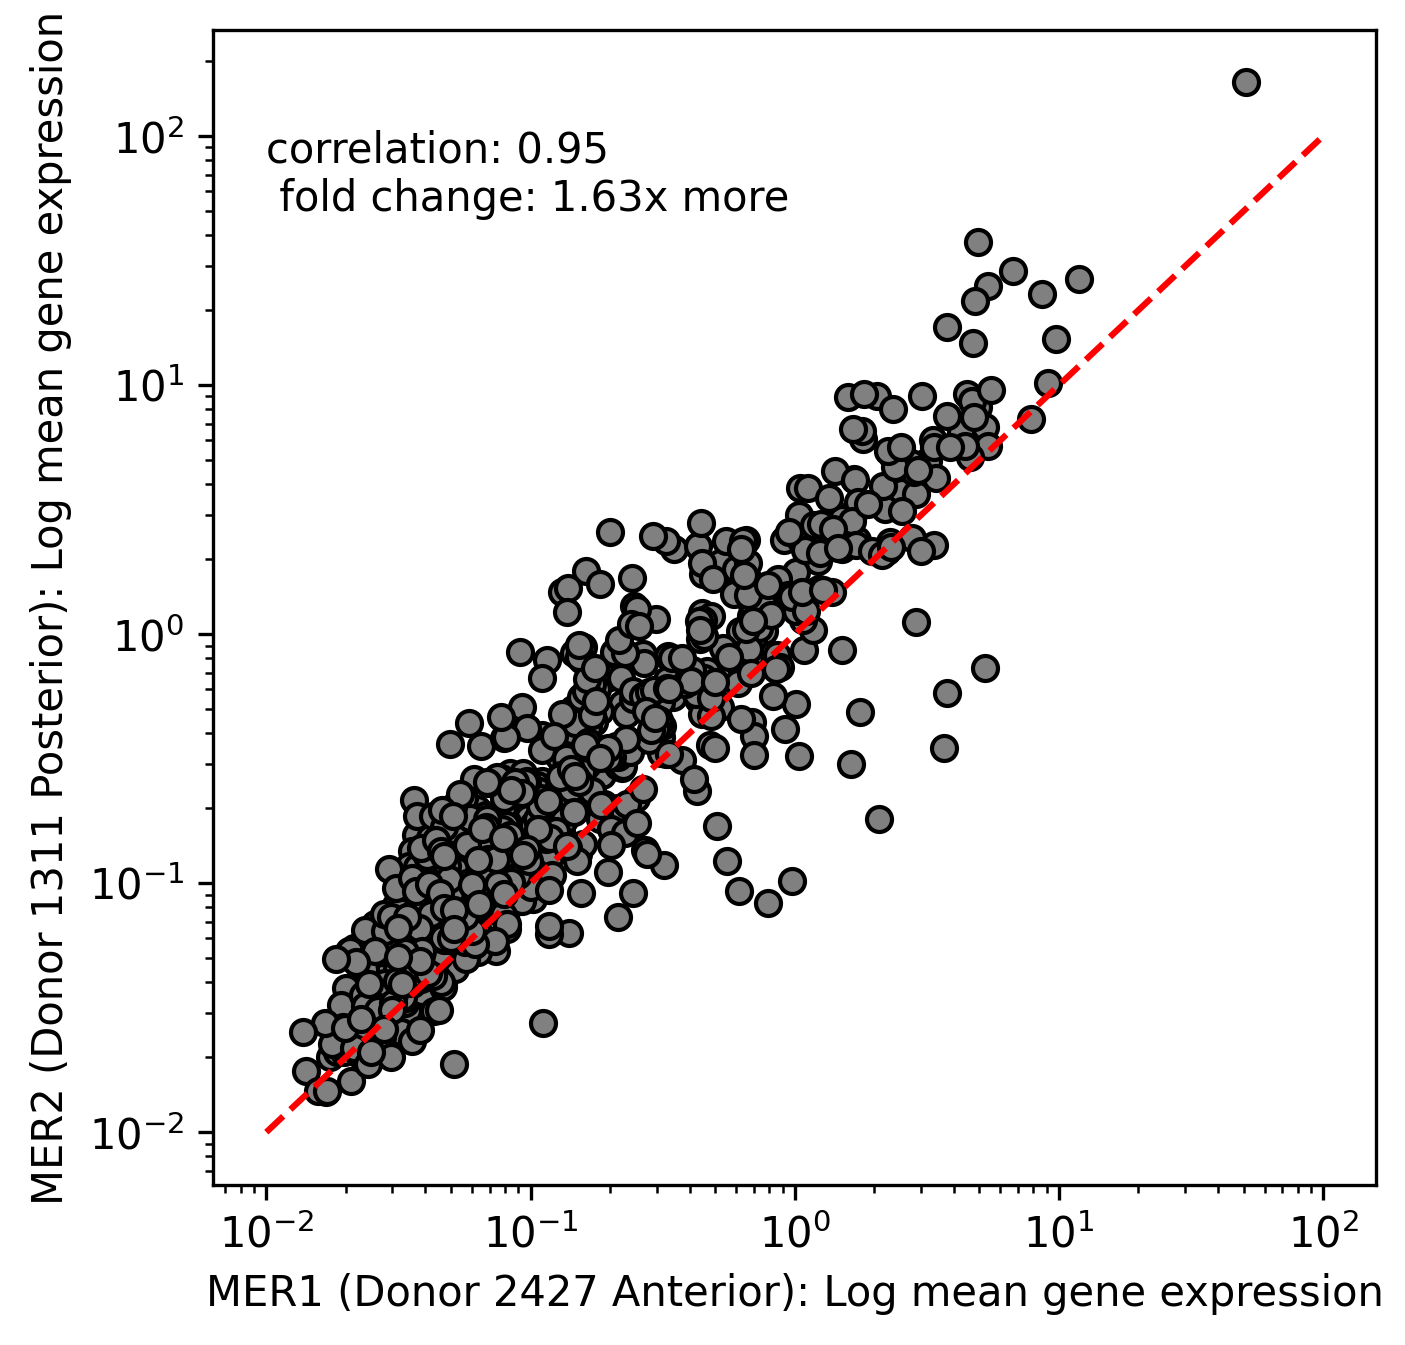

In [ ]:
import matplotlib.pyplot as plt
import scipy 

fig,ax = plt.subplots(1,1, figsize = (5,5), dpi= 300)
pearson_corr = scipy.stats.pearsonr(X_mean_MER1,X_mean_MER2).statistic
foldChange = np.median(X_mean_MER2/X_mean_MER1)
ax.loglog(X_mean_MER1,X_mean_MER2, 'o', c = 'gray', mec ='k')
ax.text(1e-2,0.5*1e2,f'correlation: {pearson_corr:.2f} \n fold change: {foldChange:.2f}x more')


ax.set_xlabel('MER1 (Donor 2427 Anterior): Log mean gene expression')
ax.set_ylabel('MER2 (Donor 1311 Posterior): Log mean gene expression')

ax.loglog([1e-2,1e2],[1e-2,1e2],'--',color='red')

plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER2_correlation.png', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER2_correlation.tif', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER2_correlation.eps', bbox_inches = 'tight')

plt.show()

- Count heatmap: Transcript Count  per FOV

In [ ]:
import glob
import os
from tqdm import tqdm 
MER2_fls = glob.glob(r'./../../Raw_custom_MERFISH_Imaging_data/20250511_XXhBG_1311/HumanBG_MERFISH_Filtered_Spots/Conv_zscan__*--spots.npz')

pos_MER2 = []
cnt_MER2 = []
for fl in tqdm(MER2_fls, desc = 'count per FOV'):
    temp = np.load(fl)
    cnt = temp['XF'].shape[0]
    cnt_MER2.append(cnt)
    fovi = int(os.path.basename(fl).split('__')[-1].split('--')[0])
    pos_fl = os.sep.join(MER2_fls[0].split(os.sep)[:-2]) + os.sep + 'H1_MER_set1' + os.sep + f'Conv_zscan__{fovi:04d}.xml'
    txt = open(pos_fl).read().split('<stage_position type="custom">')[-1].split('</')[0]
    pos_MER2.append(eval(txt))


count per FOV: 100%|██████████| 8501/8501 [15:48<00:00,  8.97it/s]


In [14]:
pos_MER2 = np.array(pos_MER2)

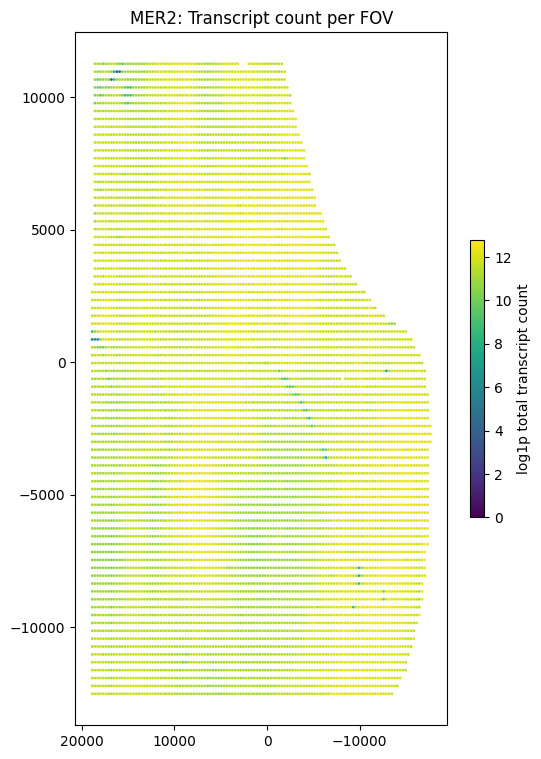

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1, figsize = (6,9))
hd = ax.scatter(pos_MER2[:,0],pos_MER2[:,1], s = 1, c = np.log1p(cnt_MER2), cmap= 'viridis', vmax = np.max(np.log1p(cnt_MER2)), vmin = 0)
plt.colorbar(hd, shrink = 0.4, label = 'log1p total transcript count')
ax.set_title('MER2: Transcript count per FOV')
ax.invert_xaxis()
plt.show()

2. MER1 Vs MER4

In [5]:
# ++++++++++++++++++++ MER1 mean count ++++++++++++++++++++++++++++++++++++++++
MER1_2427_anterior_adata.X = MER1_2427_anterior_adata.obsm['X_raw'].copy()
genes = MER1_2427_anterior_adata.var_names
X_mean_MER1 = MER1_2427_anterior_adata.X.mean(axis = 0)
# X_mean_MER1 = np.log(X_mean_MER1)

# ++++++++++++++++++++ MER2 mean count ++++++++++++++++++++++++++++++++++++++++
MER4_2427_posterior_adata.X = MER4_2427_posterior_adata.obsm['X_raw'].copy()
X_mean_MER4 = MER4_2427_posterior_adata[:,genes].X.mean(axis = 0) # Note X is raw, has not been preprocessed 
# X_mean_MER2 = np.log(X_mean_MER2)


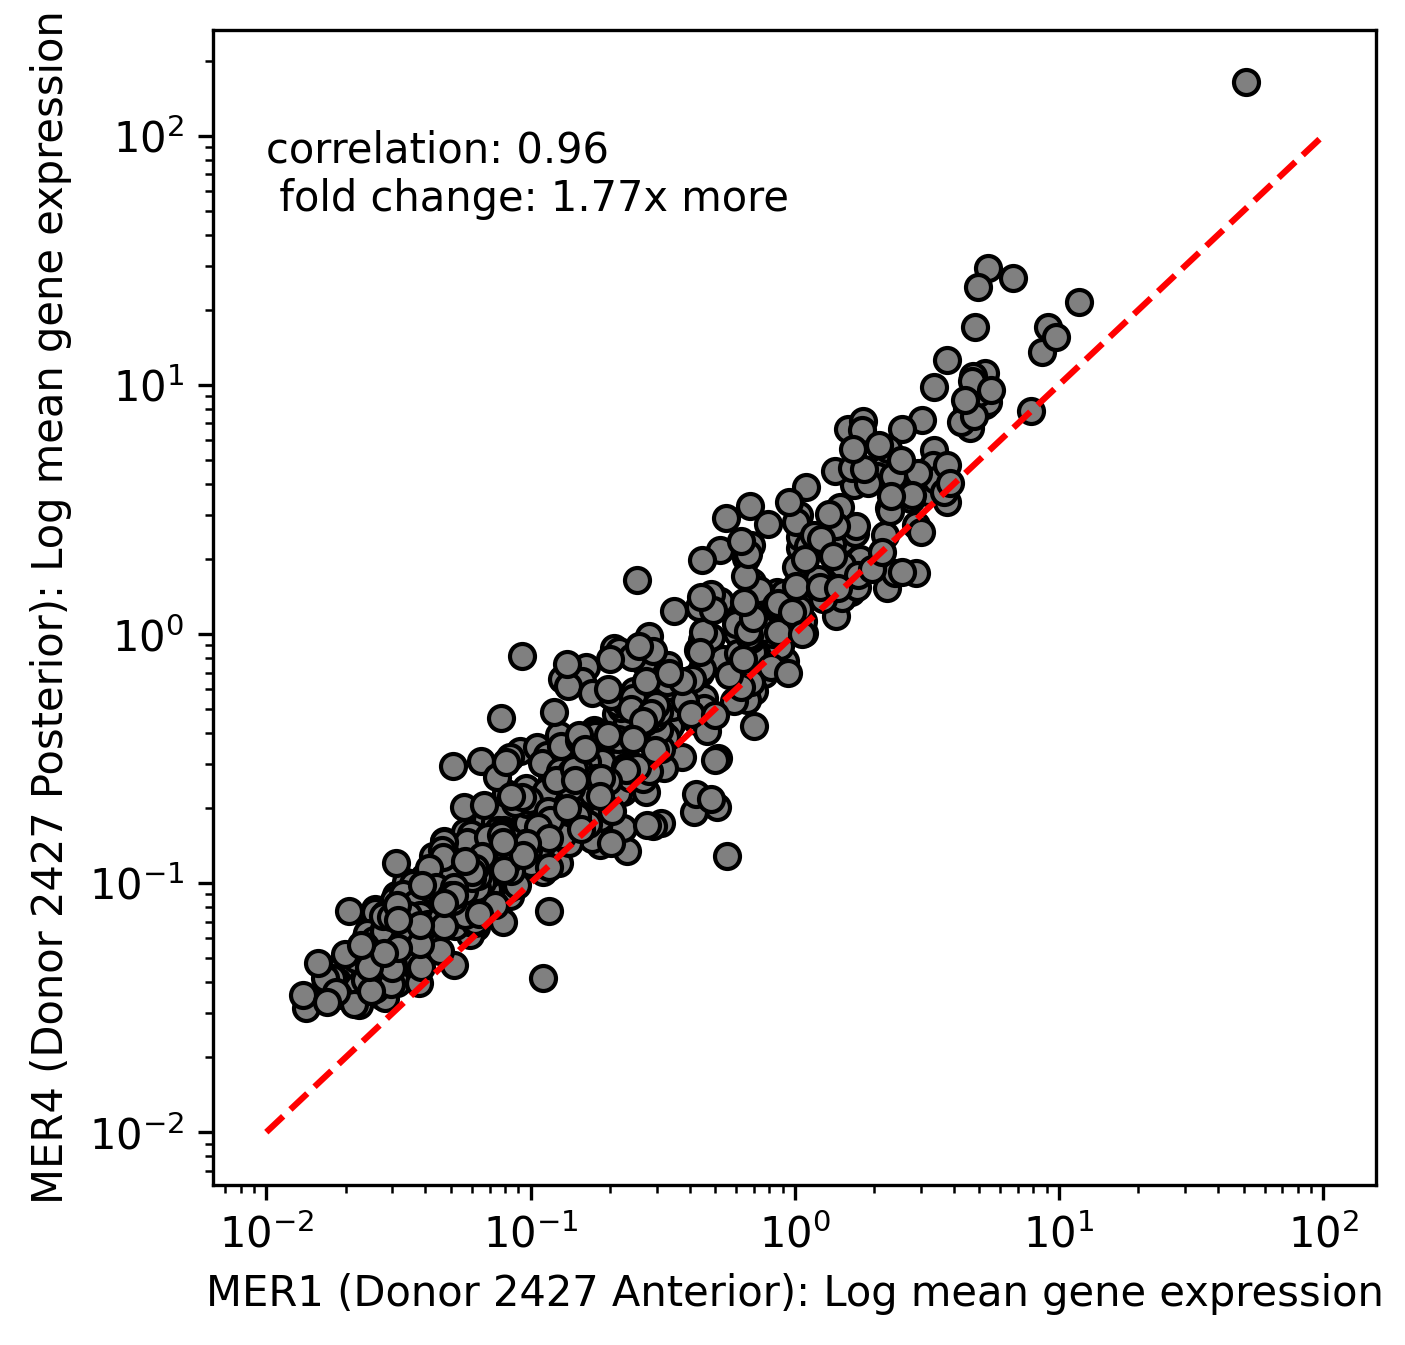

In [ ]:
import matplotlib.pyplot as plt
import scipy 

fig,ax = plt.subplots(1,1, figsize = (5,5), dpi= 300)
pearson_corr = scipy.stats.pearsonr(X_mean_MER1,X_mean_MER4).statistic
foldChange = np.median(X_mean_MER4/X_mean_MER1)
ax.loglog(X_mean_MER1,X_mean_MER4, 'o', c = 'gray', mec ='k')
ax.text(1e-2,0.5*1e2,f'correlation: {pearson_corr:.2f} \n fold change: {foldChange:.2f}x more')

ax.set_xlabel('MER1 (Donor 2427 Anterior): Log mean gene expression')
ax.set_ylabel('MER4 (Donor 2427 Posterior): Log mean gene expression')

ax.loglog([1e-2,1e2],[1e-2,1e2],'--',color='red')

plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER4_correlation.png', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER4_correlation.tif', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER4_correlation.eps', bbox_inches = 'tight')

plt.show()

Heatmap: Transcript count per FOV

In [ ]:
import glob
import os
from tqdm import tqdm 
MER4_fls = glob.glob(r'./../../Raw_custom_MERFISH_Imaging_data/20250626_hBG_2724_GPie/HumanBG_MERFISH_Filtered_Spots/Conv_zscan__*--spots.npz')

pos_MER4 = []
cnt_MER4 = []
for fl in tqdm(MER4_fls, desc = 'count per FOV'):
    temp = np.load(fl)
    cnt = temp['XF'].shape[0]
    cnt_MER4.append(cnt)
    fovi = int(os.path.basename(fl).split('__')[-1].split('--')[0])
    pos_fl = os.sep.join(MER4_fls[0].split(os.sep)[:-2]) + os.sep + 'H1_MER_set1' + os.sep + f'Conv_zscan__{fovi:04d}.xml'
    txt = open(pos_fl).read().split('<stage_position type="custom">')[-1].split('</')[0]
    pos_MER4.append(eval(txt))


count per FOV: 100%|██████████| 5891/5891 [11:40<00:00,  8.41it/s]


In [7]:
pos_MER4 = np.array(pos_MER4)

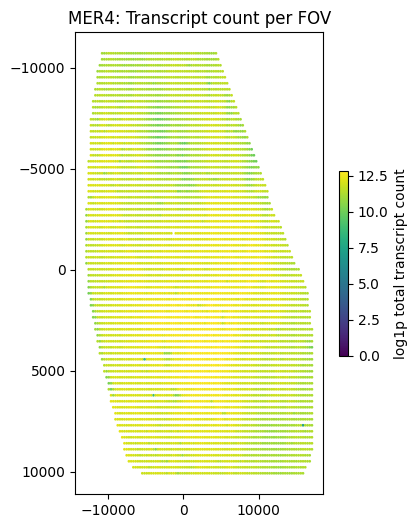

In [16]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1, figsize = (4,6))
hd = ax.scatter(pos_MER4[:,0],pos_MER4[:,1], s = 0.9, c = np.log1p(cnt_MER4), cmap= 'viridis', vmax =  np.max(np.log1p(cnt_MER4)), vmin = 0)
plt.colorbar(hd, shrink = 0.4, label = 'log1p total transcript count')
ax.set_title('MER4: Transcript count per FOV')
ax.invert_yaxis()
plt.show()

3. MER5 vs MER1

In [ ]:
import glob 
import os
from tqdm import tqdm 

MER1_xml_fls = glob.glob(r'./../../Raw_custom_MERFISH_Imaging_data/20250430_XXhBG_2724/H1_MER_set1/Conv_zscan__*.xml')
# maker sure the files are sorted based on the FOV id 
MER1_xml_fls = sorted(MER1_xml_fls, key = lambda x : int(os.path.basename(x).split('__')[-1].split('.')[0]))

pos_MER1 = []
for fl in tqdm(MER1_xml_fls, desc = 'get position per FOV'):
    txt = open(fl).read().split('<stage_position type="custom">')[-1].split('</')[0]
    pos_MER1.append(eval(txt))
pos_MER1 = np.array(pos_MER1)

get position per FOV: 100%|██████████| 5147/5147 [00:07<00:00, 661.01it/s]


In [ ]:
MER5_xml_fls = glob.glob(r'./../../Raw_custom_MERFISH_Imaging_data/20250720_hBG_3924_CaPuNAc/H1_MER_set1/Conv_zscan__*.xml')
# maker sure the files are sorted based on the FOV id 
MER5_xml_fls = sorted(MER5_xml_fls, key = lambda x : int(os.path.basename(x).split('__')[-1].split('.')[0]))

pos_MER5 = []
for fl in tqdm(MER5_xml_fls, desc = 'get position per FOV'):
    txt = open(fl).read().split('<stage_position type="custom">')[-1].split('</')[0]
    pos_MER5.append(eval(txt))
pos_MER5 = np.array(pos_MER5)

get position per FOV: 100%|██████████| 4907/4907 [00:30<00:00, 159.19it/s]


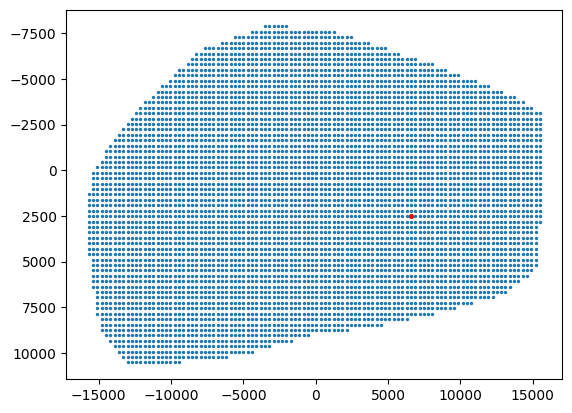

In [25]:
# Pick FOV within similar brain region, Putamen
import matplotlib.pyplot as plt

fovidx = 1000

plt.scatter(pos_MER1[:,0],pos_MER1[:,1], s = 2)
plt.scatter(pos_MER1[fovidx,0],pos_MER1[fovidx,1], s = 7, c = 'r')
plt.gca().invert_yaxis()
plt.show()

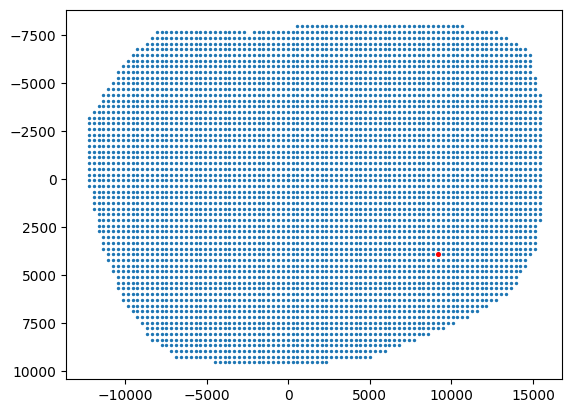

In [27]:
import matplotlib.pyplot as plt

fovidx = 800

plt.scatter(pos_MER5[:,0],pos_MER5[:,1], s = 2)
plt.scatter(pos_MER5[fovidx,0],pos_MER5[fovidx,1], s = 7, c = 'r')
plt.gca().invert_yaxis()
plt.show()

### MER1 Vs MER5

In [7]:
# ++++++++++++++++++++ MER1 mean count ++++++++++++++++++++++++++++++++++++++++
MER1_2427_anterior_adata.X = MER1_2427_anterior_adata.obsm['X_raw'].copy()
genes = MER1_2427_anterior_adata.var_names
X_mean_MER1 = MER1_2427_anterior_adata.X.mean(axis = 0)
# X_mean_MER1 = np.log(X_mean_MER1)

# ++++++++++++++++++++ MER2 mean count ++++++++++++++++++++++++++++++++++++++++
MER5_3924_anterior_adata.X = MER5_3924_anterior_adata.obsm['X_raw'].copy()
X_mean_MER5 = MER5_3924_anterior_adata[:,genes].X.mean(axis = 0) # Note X is raw, has not been preprocessed 
# X_mean_MER2 = np.log(X_mean_MER2)


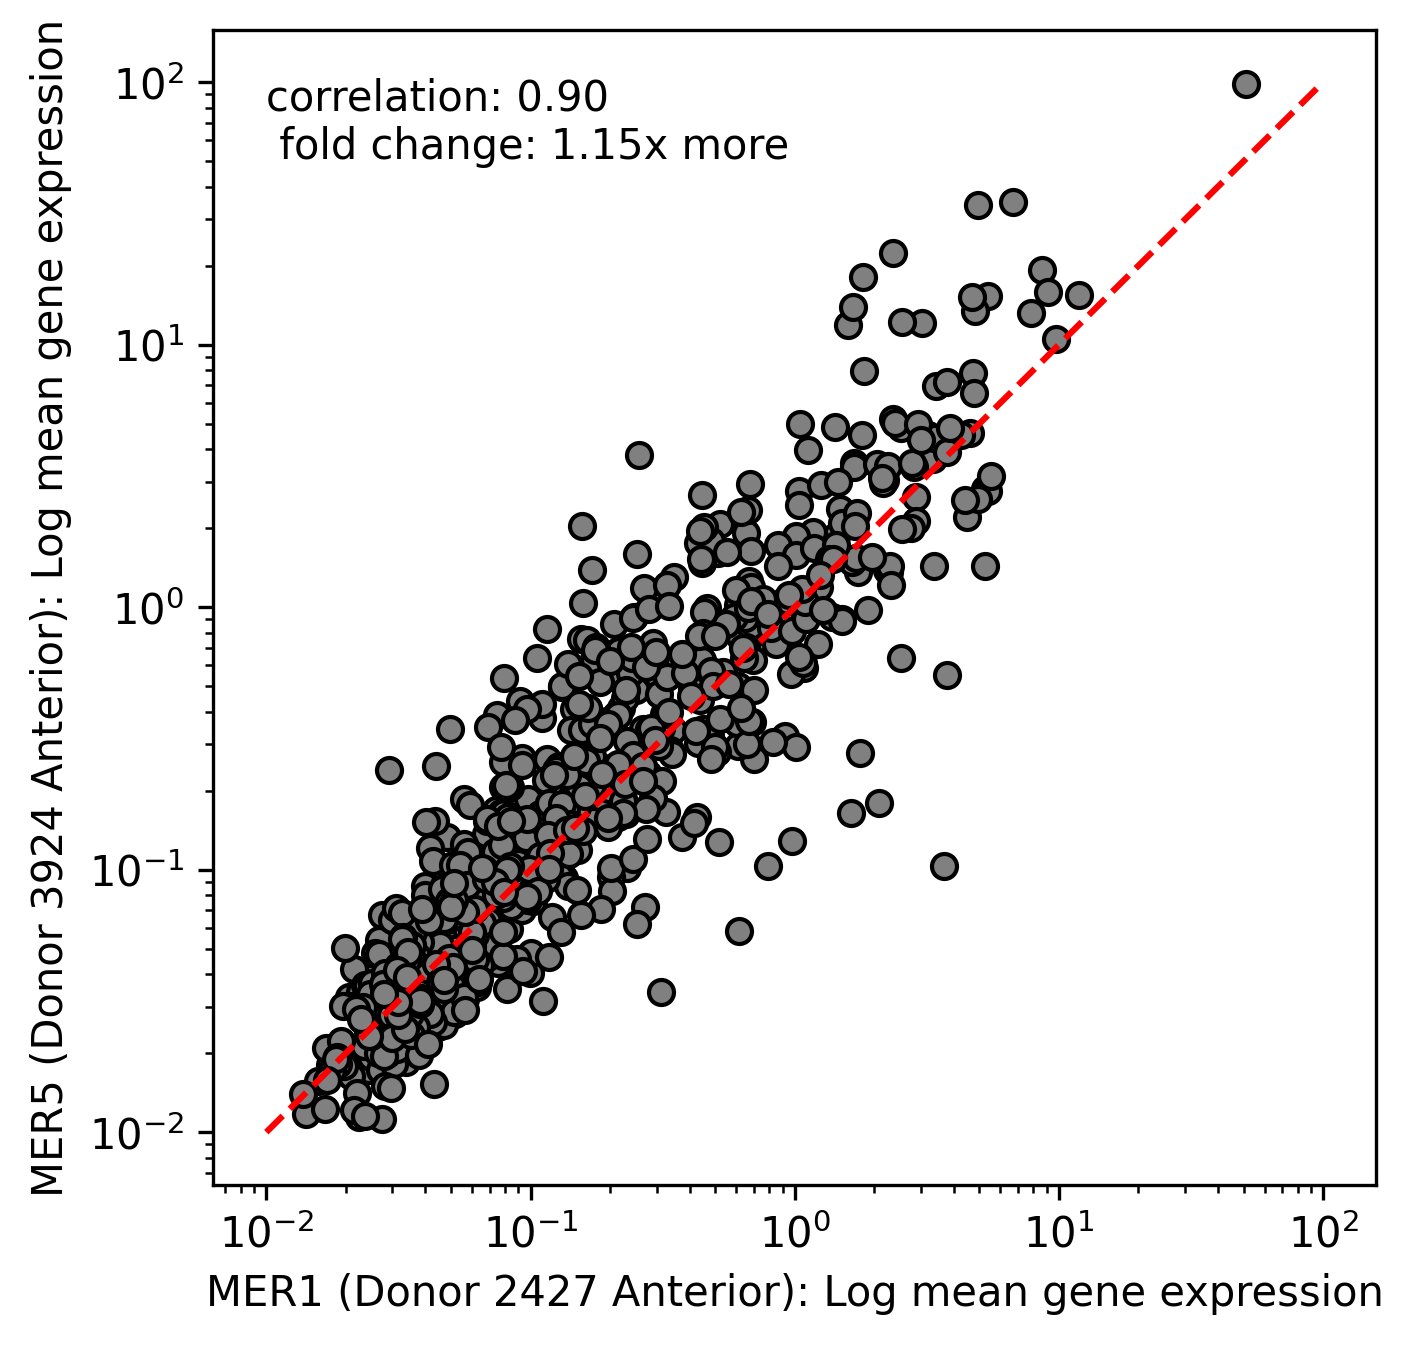

In [ ]:
import matplotlib.pyplot as plt
import scipy 

fig,ax = plt.subplots(1,1, figsize = (5,5), dpi= 300)
pearson_corr = scipy.stats.pearsonr(X_mean_MER1,X_mean_MER5).statistic
foldChange = np.median(X_mean_MER5/X_mean_MER1)
ax.loglog(X_mean_MER1,X_mean_MER5, 'o', c = 'gray', mec = 'k')

ax.text(1e-2,0.51e2,f'correlation: {pearson_corr:.2f} \n fold change: {foldChange:.2f}x more')

ax.set_xlabel('MER1 (Donor 2427 Anterior): Log mean gene expression')
ax.set_ylabel('MER5 (Donor 3924 Anterior): Log mean gene expression')
ax.loglog([1e-2,1e2],[1e-2,1e2],'--',color='red')


plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER5_correlation.png', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER5_correlation.tif', bbox_inches = 'tight')
plt.savefig(r'./../../figures/Figure1/supplemental/MER1_MER5_correlation.eps', bbox_inches = 'tight')
plt.show()

- Heatmap : Transcript count per FOV

In [ ]:
import glob
import os
from tqdm import tqdm 
MER5_fls = glob.glob(r'./../../Raw_custom_MERFISH_Imaging_data/20250720_hBG_3924_CaPuNAc/HumanBG_MERFISH_Filtered_Spots/Conv_zscan__*--spots.npz')

pos_MER5 = []
cnt_MER5 = []
for fl in tqdm(MER5_fls, desc = 'count per FOV'):
    temp = np.load(fl)
    cnt = temp['XF'].shape[0]
    cnt_MER5.append(cnt)
    fovi = int(os.path.basename(fl).split('__')[-1].split('--')[0])
    pos_fl = os.sep.join(MER5_fls[0].split(os.sep)[:-2]) + os.sep + 'H1_MER_set1' + os.sep + f'Conv_zscan__{fovi:04d}.xml'
    txt = open(pos_fl).read().split('<stage_position type="custom">')[-1].split('</')[0]
    pos_MER5.append(eval(txt))

count per FOV: 100%|██████████| 4905/4905 [07:24<00:00, 11.05it/s]


In [4]:
pos_MER5 = np.array(pos_MER5)
pos_MER5.shape

(4905, 2)

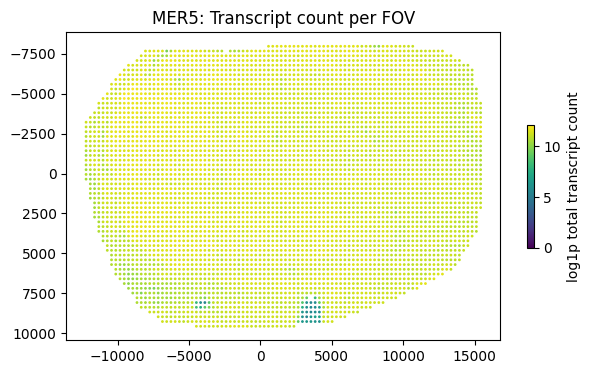

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1, figsize = (7,4))
hd = ax.scatter(pos_MER5[:,0],pos_MER5[:,1], s = 1, c = np.log1p(cnt_MER5), cmap= 'viridis', vmax= np.max(np.log1p(cnt_MER5)) ,vmin = 0)
plt.colorbar(hd, shrink = 0.4, label = 'log1p total transcript count')
ax.set_title('MER5: Transcript count per FOV')
ax.invert_yaxis()
plt.show()